In [234]:
# Import helper function file for WCS data analysis
from wcs_helper_functions import *

# Import relevant Python libraries
import numpy as np
from scipy import stats
from random import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
# Load naming data
namingData = readNamingData('./WCS_data_core/term.txt');

# "namingData" is a hierarchical dictionary organized by language->speaker->chip index(key)-color term(value)
# For example, to obtain naming data from language 1 and speaker 1 for all 330 color chips:
# Delete the semicolon to display data in full (long)

# language, speaker, chip

#len(namingData)
#len(namingData[1])
# Note: Index for languages ranges from 1 to 110 (i.e. 110 languages in total);
# index for speakers begins with 1, but its range varies depending on language
# For example, to see how many speakers language 1 has:
#len(namingData[1])

In [236]:
# Load speaker information
speakerInfo = readSpeakerData('./WCS_data_core/spkr-lsas.txt')

# "speakerInfo" is a hierarchical dictionary organized by language->speaker(key)-(age,gender)(value)
# To access (age, gender) information for all speakers from language 1
print(speakerInfo[5])

{1: [('29', 'M')], 2: [('20', 'M')], 3: [('40', 'F')], 4: [('16', 'F')], 5: [('24', 'M')], 6: [('30', 'M')]}


In [237]:
# calculate average number of color naming for each age
all_category = [namingData[2][2][key] for key in namingData[2][2]]
unique_categories = np.unique(all_category)
print(unique_categories)

['AA' 'AT' 'AW' 'EP' 'IR' 'IT' 'KA' 'NR' 'TK' 'YN']


In [238]:
age_categories = {}
all_ptcp = []
for lang in range(1, len(namingData)+1):
    age_categories[lang] = {}
    for ptcp in range(1, len(namingData[lang])+1): # number of participants for language 'lang'
        # get number of categories
        total = [namingData[lang][ptcp][key] for key in namingData[lang][ptcp]]
        num_categories = len(np.unique(total))
        
        # get age
        try: 
            age = speakerInfo[lang][ptcp][0][0]
        except:
            continue
        
        # get pair
        pair = (num_categories, int(age))
        all_ptcp.append(pair)
        age_categories[lang][ptcp] = pair
        
print(age_categories[6])

{1: (8, 40), 2: (10, 35), 3: (11, 55), 4: (8, 45), 5: (13, 18), 6: (10, 25), 7: (8, 32), 8: (11, 27), 9: (9, 37), 10: (7, 25), 11: (10, 50), 12: (8, 22), 13: (16, 52), 14: (7, 50), 15: (8, 50), 16: (17, 32), 17: (22, 30), 18: (13, 36), 19: (11, 37), 20: (10, 34), 21: (6, 40), 22: (7, 50), 23: (11, 30), 24: (12, 25), 25: (10, 25), 26: (16, 35), 27: (11, 32)}


In [239]:
all_ptcp_by_age = {}
# all participants group by their age
for pair in all_ptcp:
    age = pair[1]
    cat = pair[0]
    if age not in all_ptcp_by_age:
        all_ptcp_by_age[age] = [cat]
    else:
        all_ptcp_by_age[age].append(cat)

0.4330624654177022


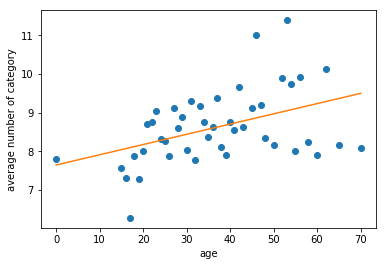

In [240]:
avg_cat_per_age = {}
# average number of categories by each age (0 - 91)
for key in sorted(all_ptcp_by_age):
    #we don't use data if the number of participants in this age is small than 15
    #since sample size is too small
    if len(all_ptcp_by_age[key]) < 15:
        continue
    avg_cat_per_age[key] = np.mean(all_ptcp_by_age[key])
    
x = list(avg_cat_per_age.keys())
y = list(avg_cat_per_age.values())

#correlation 
print(stats.pearsonr(x, y)[0])  

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y
plt.xlabel('age')
plt.ylabel('average number of category')
plt.plot(x, y, 'o', x, fit_fn(x))

[7.794117647058823, 7.324503311258278, 8.506311360448807, 8.366355140186917, 8.954761904761904, 8.718120805369127, 8.478494623655914, 8.45945945945946, 7.066666666666666, 6.333333333333333]


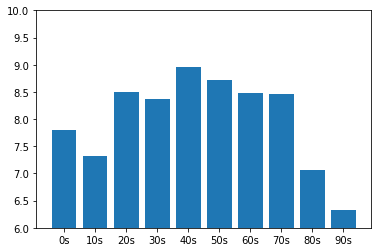

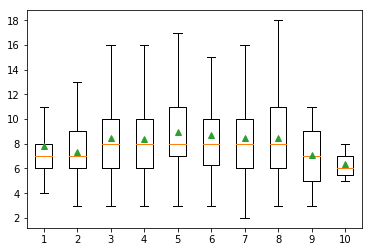

In [241]:
cat_per_age_group = [[]] * 10
# average number of categories by age groups(10 groups: 0s, 10s, 20s, 30s, 40s, ...)
for i in sorted(all_ptcp_by_age):
    group = i // 10
    temp = cat_per_age_group[group]
    cat_per_age_group[group] = temp + all_ptcp_by_age[i]
avg_cat_per_age_group = [np.mean(ele) for ele in cat_per_age_group]
print(avg_cat_per_age_group)

groups = ['0s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
plt.bar(groups, avg_cat_per_age_group)
plt.ylim([6, 10])
plt.show()
plt.boxplot(cat_per_age_group, showfliers=False, showmeans=True)
plt.show()

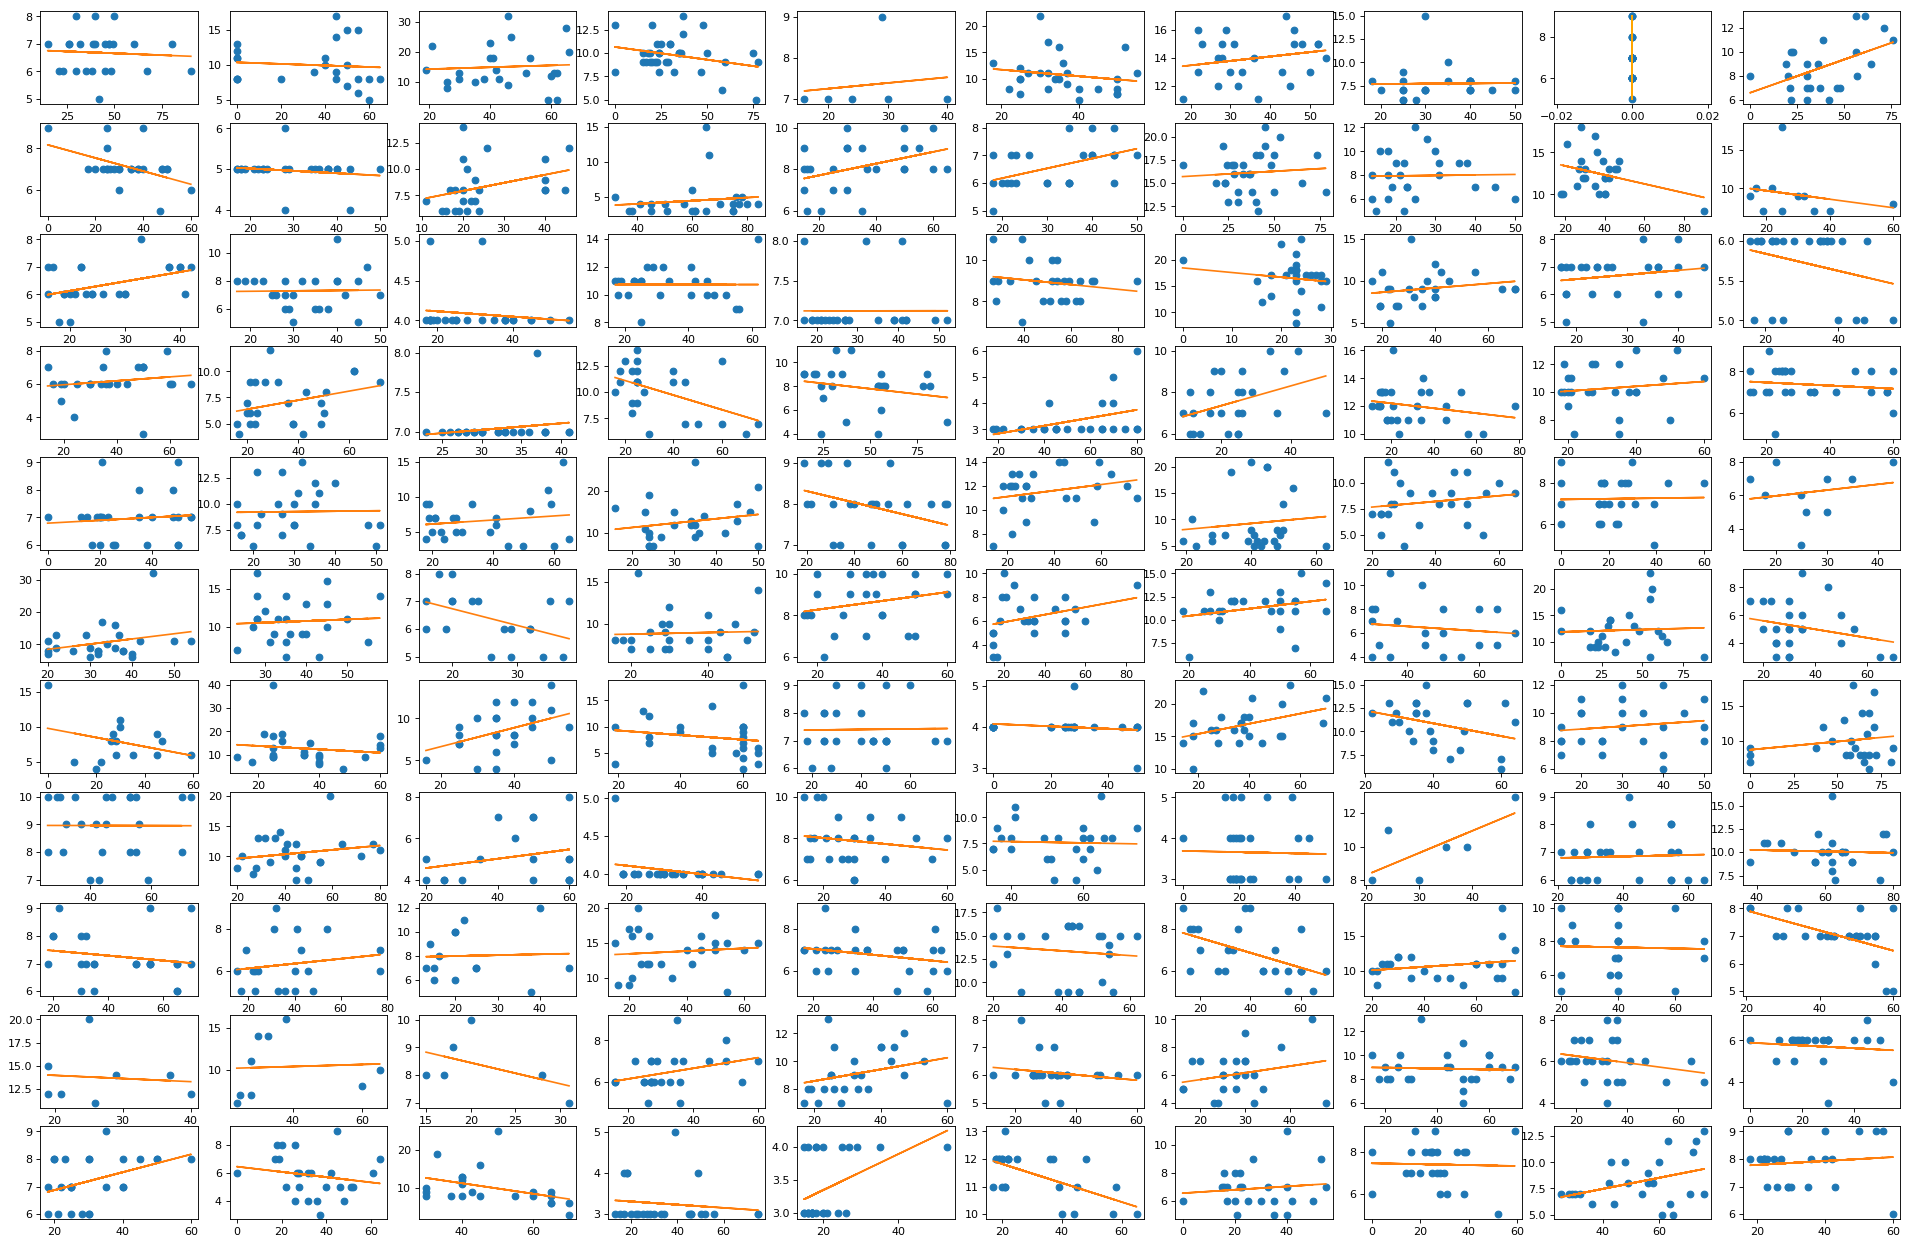

In [242]:
# linear regression for individual language group
correlation_list = []
slope_list = []
fig = plt.figure(figsize=(30, 20), dpi= 80, facecolor='w', edgecolor='k')
for lang in range(1, len(namingData)+1):
    age = [int(age_categories[lang][key][1]) for key in age_categories[lang]]
    num = [age_categories[lang][key][0] for key in age_categories[lang]]
    correlation_list.append(stats.pearsonr(age, num)[0])
## report: individual language too little participants/datapoints
    plt.subplot(11,10,lang)
    plt.scatter(age, num)
    try:
        fit = np.polyfit(age,num,1)
        fit_fn = np.poly1d(fit) 
        plt.plot(age, num, '.', age, fit_fn(age))
        slope_list.append(fit_fn[1])
    except ValueError:
        plt.plot(age, num, color='orange')
        slope_list.append(0)

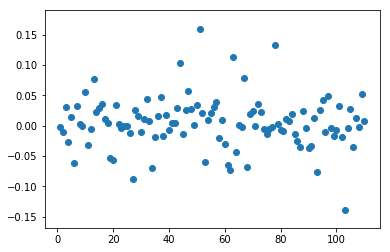

In [243]:
# all slopes from LR vs 110 groups
x = [i for i in range(1, len(namingData)+1)]
plt.scatter(x, slope_list)
plt.show()

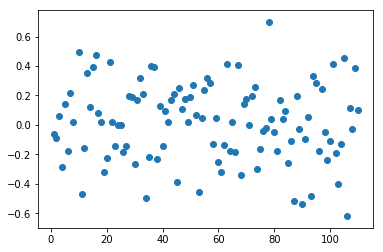

In [244]:
x = [i for i in range(1, len(namingData)+1)]
plt.scatter(x, correlation_list)
plt.show()